# Assignment 2

## 1 Feedforward: Building a ReLU neural network

Consider the rectified linear activation function : hj = max(0; aj).  

### 1.1 Draw a network with:  
• 2 inputs  
• 1 hidden layers with 3 hidden units and a  
• 1-class output (for binary classification)  

![1.png](https://i.loli.net/2019/10/28/5TDcLEZntKa1AVd.png)

### 1.2 Write out the mathematical equation for the output of this network.

$$h_1 = ReLU(x_1*w_{11} + x_2*w_{21}+b_1)$$
$$h_2 = ReLU(x_1*w_{12} + x_2*w_{22}+b_2)$$
$$h_3 = ReLU(x_1*w_{13} + x_2*w_{23}+b_3)$$
$$y = sigmoid(h_1*v_1+h_2*v_2+h_3*v_3+c)$$

### 1.3 Write out the forward-pass function in python, call it ff_nn_ReLu(...)

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random

In [3]:
def ReLU(x):
    return np.maximum(0, x)

def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y

def ff_nn_ReLu(x, W, b, V, c):
    h = ReLU(np.dot(x, W)+b)
    y = sigmoid(np.dot(h, V)+c)
    return np.array(y)

### 1.4 Suppose you have the following set of weight matrices:

In [4]:
W = np.array([[1, -1, 0],[0, 0, 0.5]])
b = np.array([0, 0, 1])
V = np.array([1, 0, -1])
c = np.array([1])
x = np.array([[1, -1],[0, -1],[0, 1]])
print("W = ", W)
print("b = ", b)
print("V = ", V)
print("c = ", c)
print("x = ", x)

W =  [[ 1.  -1.   0. ]
 [ 0.   0.   0.5]]
b =  [0 0 1]
V =  [ 1  0 -1]
c =  [1]
x =  [[ 1 -1]
 [ 0 -1]
 [ 0  1]]


what are the class probabilities associated with the forward pass of each sample?

In [5]:
y = ff_nn_ReLu(x, W, b, V, c)
print(y)

[0.81757448 0.62245933 0.37754067]


## 2 Gradient Descent

Consider a simple non-convex function of two variables:
$$f(x,y)=(1-x^3)+100*(y^2-x)^2$$

### 2.1 What are the partial derivatives of f with respect to x and to y?

$$\frac{df}{dx} = -3*x^2-200*(y^2-x)$$
$$\frac{df}{dy} = 400*y*(y^2-x)$$

### 2.2 Create a visualization of the contours of the Rosenbrock function.

Rosenbrock function:
$$f(x,y) = (1-x)^2 + 100*(y-x^2)^2$$

In [6]:
def rosenbrock(x, y):
    return (1-x)**2 + 100*(y-x**2)**2

In [7]:
N = 1000
x1 = np.linspace(-1.5, 1.5, N)
x2 = np.linspace(-1.0, 3.0, N)
X1_grid, X2_grid = np.meshgrid(x1, x2)

# X = np.array([X1_grid, X2_grid]).T
y_hat = rosenbrock(X1_grid, X2_grid)

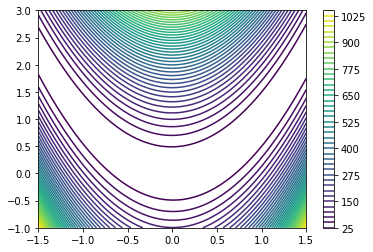

In [8]:
fig, ax = plt.subplots()
cs = ax.contour(X1_grid, X2_grid, y_hat, 50)
cbar = fig.colorbar(cs)

### 2.3 Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [9]:
def grad_f(vector):
    x, y = vector
    df_dx = 2 * (x - 1) + 400 * x * (x**2 - y)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=1):
    if starting_point:
        point = starting_point
    else:
        x = np.random.uniform(-1.5, 1.5)
        y = np.random.uniform(-1, 3)
        point = np.array([x, y])
    trajectory = [point]
    values = [rosenbrock(point[0], point[1])]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
        values.append(rosenbrock(point[0], point[1]))
    return (np.array(trajectory), values)

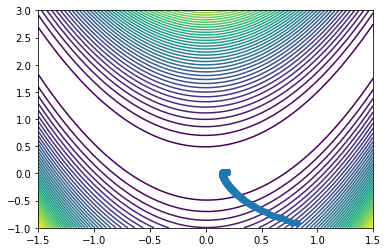

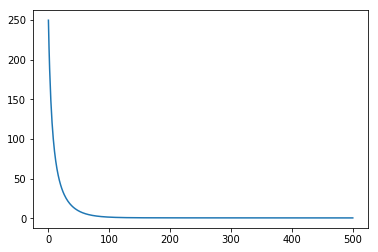

In [10]:
# learning rate = 0.0001

np.random.seed(10)
traj, values = grad_descent(iterations=500, learning_rate=0.0001)

fig, ax = plt.subplots()
cs = ax.contour(X1_grid, X2_grid, y_hat, 50)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y, '-o')

fig, ax = plt.subplots()
plt.plot(values)

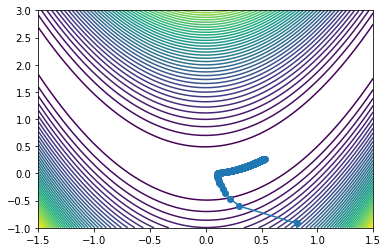

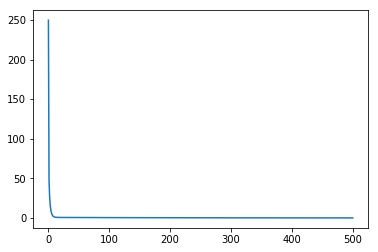

In [11]:
# learning rate = 0.001

np.random.seed(10)
traj, values = grad_descent(iterations=500, learning_rate=0.001)

fig, ax = plt.subplots()
cs = ax.contour(X1_grid, X2_grid, y_hat, 50)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y, '-o')

fig, ax = plt.subplots()
plt.plot(values)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


[[  0.81396193  -0.9169922 ]
 [ -4.32501417   2.24206025]
 [280.60420957  35.16943486]
 ...
 [         nan          nan]
 [         nan          nan]
 [         nan          nan]]


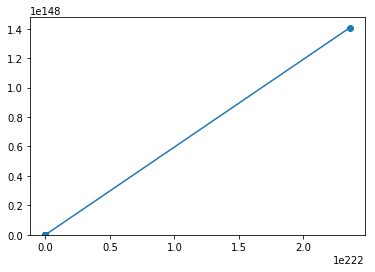

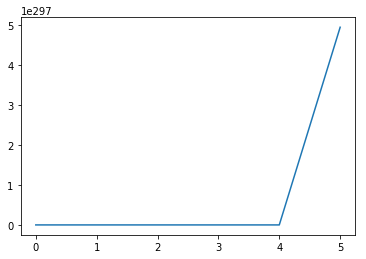

In [12]:
# learning rate = 0.01

np.random.seed(10)
traj, values = grad_descent(iterations=500, learning_rate=0.01)
print(traj)
fig, ax = plt.subplots()
cs = ax.contour(X1_grid, X2_grid, y_hat, 50)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y, '-o')

fig, ax = plt.subplots()
plt.plot(values)

### 2.4 Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [13]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, learning_rate=0.001):
    if starting_point:
        point = starting_point
    else:
        x = np.random.uniform(-1.5, 1.5)
        y = np.random.uniform(-1, 3)
        point = np.array([x, y])
    trajectory = [point]
    values = [rosenbrock(point[0], point[1])]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + learning_rate*grad
        point = point - v
        trajectory.append(point)
        values.append(rosenbrock(point[0], point[1]))
    return (np.array(trajectory), values)

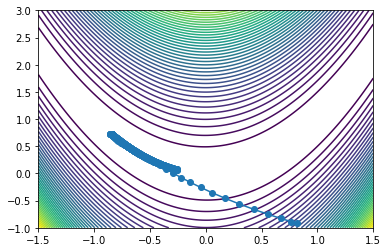

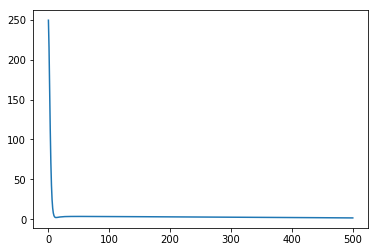

In [14]:
# learning rate = 0.0001
# alpha = 0.9

np.random.seed(10)
traj, values = grad_descent_with_momentum(iterations=500, alpha=.9, learning_rate=0.0001)

fig, ax = plt.subplots()
cs = ax.contour(X1_grid, X2_grid, y_hat, 50)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y, '-o')

fig, ax = plt.subplots()
plt.plot(values)

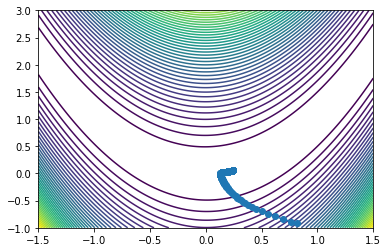

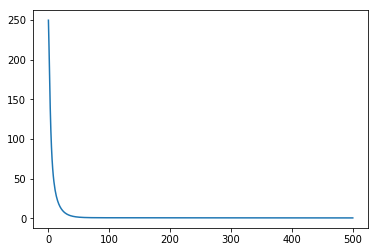

In [15]:
# learning rate = 0.0001
# alpha = 0.5

np.random.seed(10)
traj, values = grad_descent_with_momentum(iterations=500, alpha=.5, learning_rate=0.0001)

fig, ax = plt.subplots()
cs = ax.contour(X1_grid, X2_grid, y_hat, 50)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y, '-o')

fig, ax = plt.subplots()
plt.plot(values)

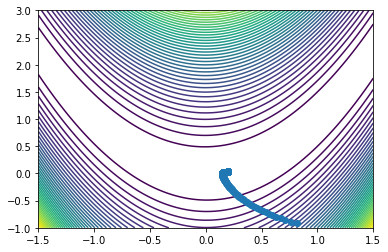

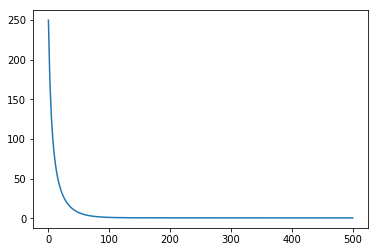

In [16]:
# learning rate = 0.0001
# alpha = 0.1

np.random.seed(10)
traj, values = grad_descent_with_momentum(iterations=500, alpha=.1, learning_rate=0.0001)

fig, ax = plt.subplots()
cs = ax.contour(X1_grid, X2_grid, y_hat, 50)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y, '-o')

fig, ax = plt.subplots()
plt.plot(values)

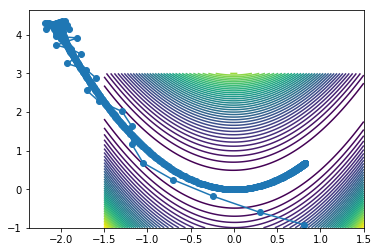

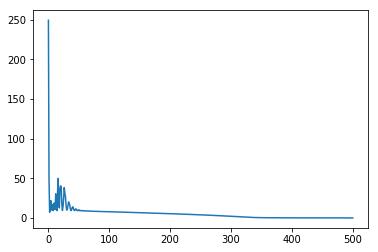

In [17]:
# learning rate = 0.001
# alpha = 0.9

np.random.seed(10)
traj, values = grad_descent_with_momentum(iterations=500, alpha=.9, learning_rate=0.001)

fig, ax = plt.subplots()
cs = ax.contour(X1_grid, X2_grid, y_hat, 50)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y, '-o')

fig, ax = plt.subplots()
plt.plot(values)

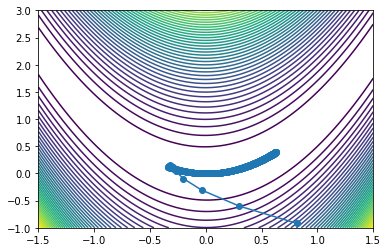

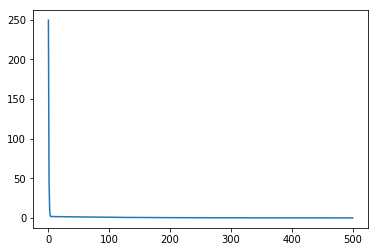

In [18]:
# learning rate = 0.001
# alpha = 0.5

np.random.seed(10)
traj, values = grad_descent_with_momentum(iterations=500, alpha=.5, learning_rate=0.001)

fig, ax = plt.subplots()
cs = ax.contour(X1_grid, X2_grid, y_hat, 50)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y, '-o')

fig, ax = plt.subplots()
plt.plot(values)

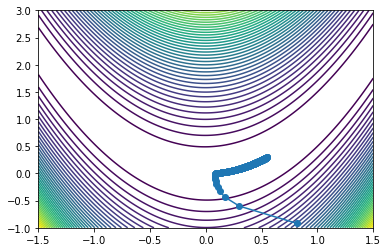

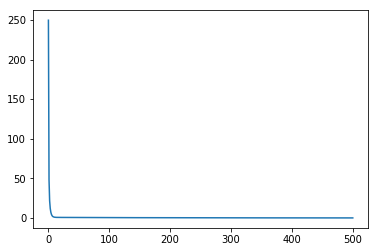

In [19]:
# learning rate = 0.001
# alpha = 0.1

np.random.seed(10)
traj, values = grad_descent_with_momentum(iterations=500, alpha=.1, learning_rate=0.001)

fig, ax = plt.subplots()
cs = ax.contour(X1_grid, X2_grid, y_hat, 50)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y, '-o')

fig, ax = plt.subplots()
plt.plot(values)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


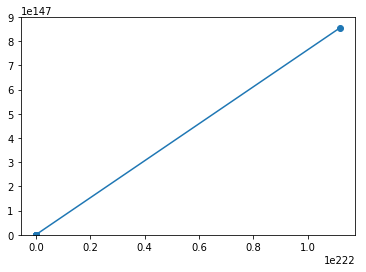

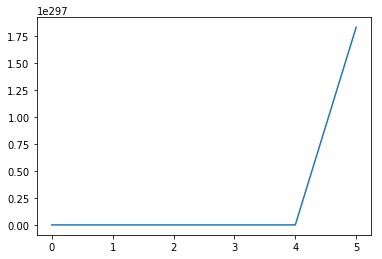

In [20]:
# learning rate = 0.01
# alpha = 0.5

np.random.seed(10)
traj, values = grad_descent_with_momentum(iterations=500, alpha=.5, learning_rate=0.01)

fig, ax = plt.subplots()
cs = ax.contour(X1_grid, X2_grid, y_hat, 50)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y, '-o')

fig, ax = plt.subplots()
plt.plot(values)

## 3 Backprop
### 3.1 For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

$$\frac{dL}{dc} = -(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})*\hat{y}*(1-\hat{y})$$
$$\frac{dL}{dv_1} = -(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})*\hat{y}*(1-\hat{y})*h_1$$
$$\frac{dL}{dv_2} = -(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})*\hat{y}*(1-\hat{y})*h_2$$
$$\frac{dL}{dv_3} = -(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})*\hat{y}*(1-\hat{y})*h_3$$

$$In_1 = x_1*w_{11} + x_2*w_{21}+b_1$$
$$In_2 = x_1*w_{12} + x_2*w_{22}+b_2$$
$$In_3 = x_1*w_{13} + x_2*w_{23}+b_3$$

$$
\begin{equation}
\frac{dL}{db_1} = 
\begin{cases}
0 & {In_1 < 0}\\
-(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})*\hat{y}*(1-\hat{y})*v_1 & {In_1 > 0}
\end{cases}
\end{equation}
$$

$$
\begin{equation}
\frac{dL}{db_2} = 
\begin{cases}
0 & {In_2 < 0}\\
-(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})*\hat{y}*(1-\hat{y})*v_2 & {In_2 > 0}
\end{cases}
\end{equation}
$$

$$
\begin{equation}
\frac{dL}{db_3} = 
\begin{cases}
0 & {In_3 < 0}\\
-(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})*\hat{y}*(1-\hat{y})*v_3 & {In_3 > 0}
\end{cases}
\end{equation}
$$

$$
\begin{equation}
\frac{dL}{dw_{11}} = 
\begin{cases}
0 & {In_1 < 0}\\
-(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})*\hat{y}*(1-\hat{y})*v_1*x_1 & {In_1 > 0}
\end{cases}
\end{equation}
$$

$$
\begin{equation}
\frac{dL}{dw_{21}} = 
\begin{cases}
0 & {In_1 < 0}\\
-(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})*\hat{y}*(1-\hat{y})*v_1*x_2 & {In_1 > 0}
\end{cases}
\end{equation}
$$

$$
\begin{equation}
\frac{dL}{dw_{12}} = 
\begin{cases}
0 & {In_2 < 0}\\
-(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})*\hat{y}*(1-\hat{y})*v_2*x_1 & {In_2 > 0}
\end{cases}
\end{equation}
$$

$$
\begin{equation}
\frac{dL}{dw_{22}} = 
\begin{cases}
0 & {In_2 < 0}\\
-(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})*\hat{y}*(1-\hat{y})*v_2*x_2 & {In_2 > 0}
\end{cases}
\end{equation}
$$

$$
\begin{equation}
\frac{dL}{dw_{13}} = 
\begin{cases}
0 & {In_3 < 0}\\
-(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})*\hat{y}*(1-\hat{y})*v_3*x_1 & {In_3 > 0}
\end{cases}
\end{equation}
$$

$$
\begin{equation}
\frac{dL}{dw_{23}} = 
\begin{cases}
0 & {In_3 < 0}\\
-(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})*\hat{y}*(1-\hat{y})*v_3*x_2 & {In_3 > 0}
\end{cases}
\end{equation}
$$

### 3.2 Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [86]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.average(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return -(y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_21, w_22, w_23, b_1, b_2, b_3, v_1, v_2, v_3, c = param_vec
    w = np.array([[w_11, w_12, w_13], [w_21, w_22, w_23]])
    b = np.array([b_1, b_2, b_3])
    v = np.array([v_1, v_2, v_3])
    c = np.array([c])
    return ((w, b, v, c))

def grad_f_3(param_vec, x, y):    
    W, b, v, c = pack_params(param_vec)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a))
    
    dL_dv1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,0])
    dL_dv2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,1])
    dL_dv3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,2])
    
    dL_db1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]))
    dL_db2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]))
    dL_db3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]))

    dL_dw11 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,0])
    dL_dw12 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,0])
    dL_dw13 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,0])
    dL_dw21 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,1])
    dL_dw22 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,1])
    dL_dw23 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,1])
    
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw21, dL_dw22, dL_dw23,
                     dL_db1, dL_db2, dL_db3,
                     dL_dv1, dL_dv2, dL_dv3,
                     dL_dc])

def grad_descent_3(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=13).astype("float64")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f_3(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

def grad_descent_with_momentum_3(x, y,  iterations=10, alpha = 0.9, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=13).astype("float64")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f_3(point, x, y)
        v = alpha*v + learning_rate*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

### 3.3 Generate a synthetic dataset like the XOR pattern

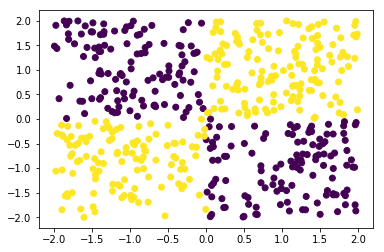

In [124]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

plt.scatter(x[:,0],x[:,1],c=y)

### 3.4 Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

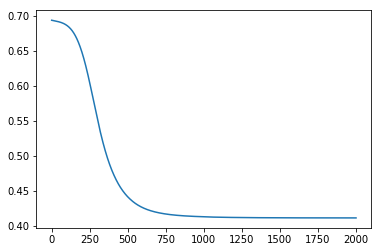

In [118]:
traj, losses = grad_descent_3(x, y, iterations=2000,learning_rate=0.1)
plt.plot(losses)

### 3.5 Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

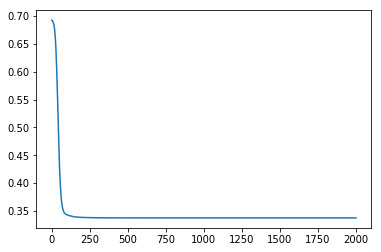

In [116]:
traj, losses = grad_descent_with_momentum_3(x, y, iterations=2000, alpha = 0.9,learning_rate=0.1)
plt.plot(losses)

Before using momentum, it takes about 1000 iterations to converge. After using momentum, it takes about 100 iterations to converge.
So it does converge more efficiently.

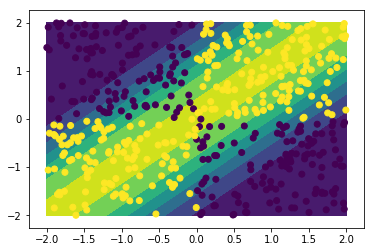

In [128]:
N = 1000
x1 = np.linspace(-2, 2, N)
x2 = np.linspace(-2, 2, N)
X1_grid, X2_grid = np.meshgrid(x1, x2)
X = np.array([X1_grid, X2_grid]).T

y_hat = yhat(X,*pack_params(traj[-1]))

fig, ax = plt.subplots()
cs = ax.contourf(X1_grid, X2_grid, y_hat)
plt.scatter(x[:,0],x[:,1],c=y)